In [1]:
import sys 
sys.path.append("C://Users//saika//Downloads")

In [2]:
import numpy as np
import networkx as nx
from dotmotif import Motif, GrandIsoExecutor
import pandas
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import statsmodels.stats.multitest as smm
import v1dd_coregistration_wrangling
 
def calc_ground_truth(pre_cells, synapse, post_cells, use_sizes=False):
    pre_cell_pt_index = pre_cells['pt_root_id']
    post_cell_pt_index = post_cells['pt_root_id']
    synapses = synapse[(synapse['pre_pt_root_id'].isin(pre_cells['pt_root_id'])) & (synapse['post_pt_root_id'].isin(post_cells['pt_root_id']))]
    pre_cell_pt_index = pre_cell_pt_index.to_list()
    post_cell_pt_index = post_cell_pt_index.to_list()

    synapse_connectome = np.zeros((len(pre_cells), len(post_cells)))
    for synapse in tqdm(range(len(synapses))):
        preidx = pre_cell_pt_index.index(synapses.iloc[synapse]['pre_pt_root_id'])
        postidx = post_cell_pt_index.index(synapses.iloc[synapse]['post_pt_root_id'])
        if use_sizes:
            synapse_connectome[preidx,postidx] += synapses.iloc[synapse]['size']
        else:
            synapse_connectome[preidx,postidx] += 1
    return synapse_connectome

c:\Users\saika\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\saika\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\saika\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
#results = pandas.read_pickle("C://Users//saika//Downloads//pyc_sai_motif_three_chain_results.pickle")

In [3]:
from data_management import LSMMData
import json

with open('test.json') as f:
    loaded_json = json.load(f)
my_data = LSMMData.LSMMData(loaded_json)
tables = my_data.data
params = my_data.params
dirs = my_data.dirs
mappings = my_data.mappings
 
print(tables['structural']['pre_cell'])
print(tables['structural']['post_cell'])
print(tables['structural']['synapse'])
 
pt_root_id = tables['structural']['pre_cell'].iloc[1]['pt_root_id']
print("Connectome Index.  Should be 41:", mappings['pt_root_id_to_connectome_index'][pt_root_id])


     index      id          pt_root_id  pt_position_x  pt_position_y  \
0        9  293764  864691132625300120         878665         697702   
1       41  295576  864691132710501931         842193         737122   
2       62  278405  864691132830575876         737898         601710   
3       76  293733  864691132616354625         858877         700030   
4       85  307952  864691132999200949         867646         840563   
..     ...     ...                 ...            ...            ...   
847   8764  371302  864691132849454803         958050         629957   
848   8769  385115  864691132679146333         975354         850418   
849   8773  383491  864691132763271347         928872         797418   
850   8790  351167  864691132579592205         927863         548865   
851   8794  277788  864691132653866455         853833         547235   

     pt_position_z classification_system cell_type status_axon  \
0           245475            excitatory        4P    extended   
1  

In [4]:
mappings['assemblies_by_connectome_index']

{377: ['A 1'],
 303: ['A 1', 'A 3', 'A 4', 'A 5', 'A 7', 'A 8'],
 10: ['A 1'],
 630: ['A 1', 'A 5', 'A 7', 'A 10'],
 458: ['A 1', 'A 3'],
 126: ['A 1'],
 749: ['A 1', 'A 4', 'A 7', 'A 8'],
 162: ['A 1', 'A 4', 'A 7', 'A 8'],
 225: ['A 1', 'A 2', 'A 8'],
 535: ['A 1', 'A 3'],
 701: ['A 1'],
 429: ['A 1', 'A 3', 'A 5'],
 663: ['A 1', 'A 2', 'A 3'],
 353: ['A 1', 'A 6'],
 425: ['A 1'],
 125: ['A 1', 'A 4'],
 201: ['A 1', 'A 6'],
 27: ['A 1', 'A 3', 'A 4'],
 837: ['A 1', 'A 2'],
 329: ['A 1', 'A 6'],
 763: ['A 1', 'A 3', 'A 8'],
 68: ['A 2', 'A 11'],
 109: ['A 2'],
 454: ['A 2'],
 730: ['A 2', 'A 10'],
 800: ['A 2', 'A 4', 'A 5'],
 391: ['A 2', 'A 10'],
 304: ['A 3'],
 229: ['A 3', 'A 7', 'A 8'],
 374: ['A 3'],
 52: ['A 4'],
 659: ['A 4'],
 806: ['A 4', 'A 5', 'A 7', 'A 8'],
 161: ['A 4', 'A 5', 'A 7', 'A 8'],
 715: ['A 5', 'A 7'],
 243: ['A 5'],
 845: ['A 6'],
 563: ['A 9', 'A 12'],
 633: ['A 9'],
 73: ['A 10'],
 728: ['A 10'],
 710: ['A 13', 'A 15'],
 298: ['A 14'],
 597: ['No A'],
 255:

In [82]:
tables['structural']['post_cell']

,index,id,pt_root_id,pt_position_x,pt_position_y,pt_position_z,classification_system,cell_type,status_axon,pt_position_x_trafo,...,layer,dist_pia,dist_1-23,dist_23-4,dist_4-5,dist_5-6,dist_WM,full_dendrite,cell_type_v2,connectome_index
0,9,293764,864691132625300120,878665,697702,245475,excitatory,4P,extended,-17654.153169,...,L4,348299.261582,248299.261582,78299.261582,51700.738418,201700.738418,401700.738418,True,4P,0
1,41,295576,864691132710501931,842193,737122,325260,inhibitory,ProxTC,extended,-67856.489452,...,L5,407818.941194,307818.941194,137818.941194,7818.941194,142181.058806,342181.058806,True,ProxTC-L5,1
2,62,278405,864691132830575876,737898,601710,294075,inhibitory,DistTC,extended,-145995.980100,...,L23,269521.726886,169521.726886,478.273114,130478.273114,280478.273114,480478.273114,True,DistTC-L23,2
3,76,293733,864691132616354625,858877,700030,240210,inhibitory,InhTC,extended,-37633.019997,...,L4,349231.413669,249231.413669,79231.413669,50768.586331,200768.586331,400768.586331,True,InhTC-L4,3
4,85,307952,864691132999200949,867646,840563,262935,excitatory,5P,extended,-69027.465946,...,L5,490673.563262,390673.563262,220673.563262,90673.563262,59326.436738,259326.436738,True,5P,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,8764,371302,864691132849454803,958050,629957,382545,inhibitory,ProxTC,extended,67043.559779,...,L4,319323.746587,219323.746587,49323.746587,80676.253413,230676.253413,430676.253413,True,ProxTC-L4,847
848,8769,385115,864691132679146333,975354,850418,394650,excitatory,6P,extended,17544.597851,...,L5,534890.730711,434890.730711,264890.730711,134890.730711,15109.269289,215109.269289,True,6P,848
849,8773,383491,864691132763271347,928872,797418,316125,excitatory,5P,extended,3578.299784,...,L5,463037.004450,363037.004450,193037.004450,63037.004450,86962.995550,286962.995550,True,5P,849
850,8790,351167,864691132579592205,927863,548865,192105,inhibitory,ProxTC,extended,51726.443534,...,L23,190364.527692,90364.527692,79635.472308,209635.472308,359635.472308,559635.472308,False,ProxTC-L23,850


In [38]:
# Full Matrix
# weight_matrix = np.load('ground_truth_summed_weights_v1dd_668.npy')
# adjacency_matrix = weight_matrix.clip(0,1)
# graph = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)

#tables, mappings = v1dd_coregistration_wrangling.get_tables_and_mappings(online=True)

# Make a graph of just excitatory cells
cell_table = tables['structural']['pre_cell']

# # cell_table = cell_table.query('soma_layer == "23"')[['pt_root_id', 'soma_layer']].reset_index()
#cell_table['connectome_index'] = cell_table['conn']

# cell_table['connectome_index'] = cell_table.index
# cell_table = cell_table.query('cell_type == "PYC"')[['connectome_index', 'pt_root_id', 'soma_layer']].reset_index()

synapse_table = tables['structural']['synapse'] #pandas.read_feather('C://Users//saika//Downloads//v1dd_with_additional_coregistered_neurons_Julian_latest_now//v1dd_with_additional_coregistered_neurons_Julian_latest//additional_coregistered_neurons//synapse_table_v1dd_shortened_additional_cells.feather')
weight_matrix = calc_ground_truth(cell_table, synapse_table, cell_table, use_sizes=True)
adjacency_matrix = weight_matrix.clip(0,1)
np.fill_diagonal(adjacency_matrix, 0)
pyr_graph = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)


100%|██████████| 163052/163052 [05:33<00:00, 488.80it/s]


In [39]:
# Motif Analysis with DotMotif
executor = GrandIsoExecutor(graph=pyr_graph)

three_chain = Motif("""
                A -> B
                B -> C
              """)

three_chain_results = executor.find(three_chain)

print('\n\t',len(three_chain_results))
with open('pyc_sai_motif_three_chain_results.pickle', 'wb') as out_file:
    pickle.dump(three_chain_results, out_file)

# length four chains, to do after three

# four_chain = Motif("""
#                 A -> B
#                 B -> C
#                 C -> D
#               """)

# four_chain_results = executor.find(four_chain)

# # print(four_chain_results)
# with open('pyc_stefan_motif_four_chain_results.pickle', 'wb') as out_file:
#     pickle.dump(four_chain_results, out_file)


	 6052393


In [76]:
list_three_chain = [list(c.values()) for c in three_chain_results]

In [ ]:
conn_idx = 710
for  a,b,c in list_three_chain:
    # print(a,b,c)
      if conn_idx  == a:
         print("Cell present")
      elif conn_idx == b:
          print("Cell present")
      elif conn_idx  == c:
          print("cell present")
    

#cell 710 is not part of any chains and is the only cell in A13 and A15(old result)

In [40]:
# Now we sort by assembly and test
    
def invert_dict(original_dict):
    inverted_dict = {}
    for key, items in original_dict.items():
        for item in items:
            if item not in inverted_dict:
                inverted_dict[item] = [key]
            else:
                inverted_dict[item].append(key)
    return inverted_dict

def update_dict_keys(key_mapping_dict, dict_to_update):
    return {key_mapping_dict.get(key, key): val for key, val in dict_to_update.items()}


In [41]:
'''delete this!!'''
len(tables['coregistration'])


167

In [42]:
len(mappings['assemblies_by_connectome_index'].keys())

55

Currently - we have **55** assembly cells(including 'NO A') and **167** cells coregistered 

In [17]:
#sum of all the chains assembly wise
#NO. OF CHAINS THE ASSEMBLY PARTICIPATES
chain_participation_dict = {"A 1": 0 ,
  "A 2": 0,
  "A 3": 0, "A 4": 0,
  "A 5": 0, "A 6": 0,
  "A 7": 0, "A 8": 0, "A 9": 0, "A 10": 0,
  "A 11": 0, "A 12": 0, "A 13": 0, "A 14": 0,
  "A 15": 0, "No A": 0 }

for chain in tqdm(three_chain_results):
    origin_cell_in_pyc_id, middle_cell_in_pyc_id, terminal_cell_in_pyc_id = chain['A'], chain['B'], chain['C']

    # Get the connectome (out of all cells, not just PYC) and root IDs for origin, middle, and terminal chain cells
    origin_cell_in_connectome_id = cell_table.iloc[origin_cell_in_pyc_id].connectome_index
    origin_cell_in_root_id = cell_table.iloc[origin_cell_in_pyc_id].pt_root_id

    middle_cell_in_connectome_id = cell_table.iloc[middle_cell_in_pyc_id].connectome_index
    middle_cell_in_root_id = cell_table.iloc[middle_cell_in_pyc_id].pt_root_id

    terminal_cell_in_connectome_id = cell_table.iloc[terminal_cell_in_pyc_id].connectome_index
    terminal_cell_in_root_id = cell_table.iloc[terminal_cell_in_pyc_id].pt_root_id


    if origin_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys(): #or middle cell or end cell   #keep it separate, OR makes it ambiguous and may not execute when more than one statement is true
           for assembly_id in mappings['assemblies_by_connectome_index'][origin_cell_in_connectome_id]:
                   if assembly_id in chain_participation_dict.keys():
                            chain_participation_dict[assembly_id]+= 1
                #    else:
                #            chain_test[assembly_id] = chain_test[assembly_id] 

    if middle_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys(): 
           for assembly_id in mappings['assemblies_by_connectome_index'][middle_cell_in_connectome_id]:
                   if assembly_id in chain_participation_dict.keys():
                            chain_participation_dict[assembly_id] += 1
                #    else:
                #            chain_test[assembly_id] = chain_test[assembly_id] 


    if terminal_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys(): 
           for assembly_id in mappings['assemblies_by_connectome_index'][terminal_cell_in_connectome_id]:
                   if assembly_id in chain_participation_dict.keys():
                            chain_participation_dict[assembly_id] += 1
                #    else:
                #            chain_test[assembly_id] = chain_test[assembly_id] 

                           

100%|██████████| 2383239/2383239 [19:19<00:00, 2055.37it/s] 


In [65]:
#total assembly cells
assembly_connectome_indices_count_dict = {"A 1": 0 ,
  "A 2": 0,
  "A 3": 0, "A 4": 0,
  "A 5": 0, "A 6": 0,
  "A 7": 0, "A 8": 0, "A 9": 0, "A 10": 0,
  "A 11": 0, "A 12": 0, "A 13": 0, "A 14": 0,
  "A 15": 0, "No A": 0 }
connectome_indxs = []
for connectome_idx in mappings['assemblies_by_connectome_index'].keys():
   for assembly_ids in mappings['assemblies_by_connectome_index'][connectome_idx]:
      if assembly_ids in assembly_connectome_indices_count_dict.keys():
          assembly_connectome_indices_count_dict[assembly_ids] += 1
          connectome_indxs.append([connectome_idx, assembly_ids])

In [66]:
assembly_connectome_indices_count_dict

{'A 1': 21,
 'A 2': 9,
 'A 3': 10,
 'A 4': 10,
 'A 5': 8,
 'A 6': 4,
 'A 7': 8,
 'A 8': 8,
 'A 9': 2,
 'A 10': 5,
 'A 11': 1,
 'A 12': 1,
 'A 13': 1,
 'A 14': 1,
 'A 15': 1,
 'No A': 12}

In [ ]:
#participation_rate
#this rate when we have only 167 co-registered and 51(41) of those are in assembly - 10 not in assembly

In [20]:
#this rate when we have 167 co-registered and 51(41) of those are in assembly - 10 not in assembly
participation_coregistered_rate = []
for assembly_id in list(chain_participation_dict.keys()):
   # interior_assembly_rates.append(interior_chains_by_assembly[assembly_id] / len(functional_cell_indexes_by_assembly[int(assembly_id[-1])]))
 if chain_participation_dict[assembly_id] != 0:
   participation_coregistered_rate.append([assembly_id, chain_participation_dict[assembly_id] / assembly_connectome_indices_count_dict[assembly_id]])

In [21]:
participation_coregistered_rate

[['A 1', 8938.714285714286],
 ['A 2', 7900.222222222223],
 ['A 3', 6619.8],
 ['A 4', 9347.5],
 ['A 5', 8657.5],
 ['A 6', 7285.5],
 ['A 7', 9969.25],
 ['A 8', 10400.5],
 ['A 9', 8122.0],
 ['A 10', 8932.4],
 ['A 11', 8531.0],
 ['A 12', 16244.0],
 ['A 14', 6498.0],
 ['No A', 5609.25]]

In [23]:
mappings['functional_indexes_by_assembly'].keys()

dict_keys(['A 1', 'A 2', 'A 3', 'A 4', 'A 5', 'A 6', 'A 7', 'A 8', 'A 9', 'A 10', 'A 11', 'A 12', 'A 13', 'A 14', 'A 15', 'No A'])

In [52]:
#this will give chains for each cell in assembly 
chain_membership_counts_by_assembly_by_cell = {}


for assembly_id in list(mappings['functional_indexes_by_assembly'].keys()):
    for cell in mappings['assemblies_by_connectome_index'].keys():
       chain_membership_counts_by_assembly_by_cell[assembly_id] = {}



In [ ]:
chain_membership_counts_by_assembly_by_cell

In [54]:
for key, value_list in mappings['assemblies_by_connectome_index'].items():
    for value in value_list:
        if value in chain_membership_counts_by_assembly_by_cell:
            # to add the key as a nested dictionary in data
            chain_membership_counts_by_assembly_by_cell[value][key] = 0

In [ ]:
chain_membership_counts_by_assembly_by_cell #assembly-cell combination ...when doing assembly to no-assembly - divide each cells participation by the assembly

In [ ]:
mappings['assemblies_by_connectome_index'].keys()

In [57]:

for chain in tqdm(three_chain_results):
    origin_cell_in_pyc_id, middle_cell_in_pyc_id, terminal_cell_in_pyc_id = chain['A'], chain['B'], chain['C']

    # Get the connectome (out of all cells, not just PYC) and root IDs for origin, middle, and terminal chain cells
    origin_cell_in_connectome_id = cell_table.iloc[origin_cell_in_pyc_id].connectome_index
    origin_cell_in_root_id = cell_table.iloc[origin_cell_in_pyc_id].pt_root_id

    middle_cell_in_connectome_id = cell_table.iloc[middle_cell_in_pyc_id].connectome_index
    middle_cell_in_root_id = cell_table.iloc[middle_cell_in_pyc_id].pt_root_id

    terminal_cell_in_connectome_id = cell_table.iloc[terminal_cell_in_pyc_id].connectome_index
    terminal_cell_in_root_id = cell_table.iloc[terminal_cell_in_pyc_id].pt_root_id

    if origin_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys(): #or middle cell or end cell   #keep ot separate, OR makes it ambiguous and may not execute when more than one statement is true
           for assembly_id in mappings['assemblies_by_connectome_index'][origin_cell_in_connectome_id]:
                   if assembly_id in chain_membership_counts_by_assembly_by_cell.keys():
                            chain_membership_counts_by_assembly_by_cell[assembly_id][origin_cell_in_connectome_id]+= 1
                #    else:
                #            chain_test[assembly_id] = chain_test[assembly_id] 

    if middle_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys(): 
           for assembly_id in mappings['assemblies_by_connectome_index'][middle_cell_in_connectome_id]:
                  if assembly_id in chain_membership_counts_by_assembly_by_cell.keys():
                            chain_membership_counts_by_assembly_by_cell[assembly_id][middle_cell_in_connectome_id]+= 1
                #    else:
                #            chain_test[assembly_id] = chain_test[assembly_id] 


    if terminal_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys(): 
           for assembly_id in mappings['assemblies_by_connectome_index'][terminal_cell_in_connectome_id]:
                  if assembly_id in chain_membership_counts_by_assembly_by_cell.keys():
                            chain_membership_counts_by_assembly_by_cell[assembly_id][terminal_cell_in_connectome_id]+= 1
                #    else:
                #            chain_test[assembly_id] = chain_test[assembly_id] 

                           

100%|██████████| 6052393/6052393 [50:33<00:00, 1995.15it/s]  


In [58]:
chain_membership_counts_by_assembly_by_cell['A 1']

{377: 35135,
 303: 15607,
 10: 23393,
 630: 23765,
 458: 22744,
 126: 33155,
 749: 23084,
 162: 23615,
 225: 31538,
 535: 27482,
 701: 14567,
 429: 22590,
 663: 20828,
 353: 10623,
 425: 20131,
 125: 22103,
 201: 21946,
 27: 17062,
 837: 13060,
 329: 15790,
 763: 22019}

In [ ]:
import numpy as np
import networkx as nx
from dotmotif import Motif, GrandIsoExecutor
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import statsmodels.stats.multitest as smm
from data_management import LSMMData
import json

with open('chains.json') as f:
    loaded_json = json.load(f)
my_data = LSMMData.LSMMData(loaded_json)
tables = my_data.data
params = my_data.params
dirs = my_data.dirs
mappings = my_data.mappings

# Make a graph of just excitatory cells
cell_table = tables['structural']['pre_cell']
cell_table['connectome_index'] = cell_table.index
synapse_table = tables['structural']['synapse']
adjacency_matrix = tables['structural']['binary_connectome']
pyr_graph = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)

# Motif Analysis with DotMotif
executor = GrandIsoExecutor(graph=pyr_graph)

three_chain = Motif("""
                A -> B
                B -> C
              """)

three_chain_results = executor.find(three_chain)

three_chain_results_array = np.array([list(c.values()) for c in three_chain_results])

coregistered_cell_indexes = mappings['assemblies_by_connectome_index'].keys()
no_a_cell_indexes = mappings['connectome_indexes_by_assembly']['No A']

# Get chain participation
chain_participation_by_coregistered_cell = {}
for index in coregistered_cell_indexes:
    # this only works because the index cannot appear in the same chain more than once
    chain_participation_by_coregistered_cell[index] = np.where(three_chain_results_array == index)[0].size

pooled_assembly_indexes = list(set(coregistered_cell_indexes) - set(no_a_cell_indexes))

# Pool cells which are in assemblies
pooled_assembly_cell_participation = []
for index in pooled_assembly_indexes:
    pooled_assembly_cell_participation.append(chain_participation_by_coregistered_cell[index])

# Pool cells which are not in assemblies
no_a_cell_participation = []
for index in no_a_cell_indexes:
    no_a_cell_participation.append(chain_participation_by_coregistered_cell[index])

plt.figure()
plt.box
plt.boxplot([pooled_assembly_cell_participation, no_a_cell_participation])
plt.savefig('pyr_cell_chain_participation.png')

print('A', pooled_assembly_cell_participation)
print('No A', no_a_cell_participation)
print('Done')
 

In [84]:
'''# Load assembly and coregistration data, and create useful mappings
functional_cell_indexes_by_assembly = tables['functional_indexes_by_assembly']
assemblies_by_functional_index = tables['assemblies_by_functional_index']
coregistered_cells = tables['coregistration']
connectome_id_to_root_id_mapping = mappings['connectome_index_to_root_id']
# connectome_id_to_functional_id_mapping = dict(coregistered_cells[['unit_id', 'id']].values)
# functional_id_to_pt_root_id_mapping = dict(coregistered_cells[['id', 'pt_root_id']].values)
# connectome_id_to_root_id_mapping = dict(cell_table[['connectome_index', 'pt_root_id']].values)
assemblies_by_connectome_index = mappings['assemblies_by_connectome_index'] #update_dict_keys(connectome_id_to_functional_id_mapping, assemblies_by_functional_index)
coregistered_unit_ids = list(coregistered_cells['unit_id'].values)

# Set up storage for assembly sorting
psd_size_list_by_assembly = {}
interior_chains_by_assembly = {}
chains_between_assemblies = {}
interior_chains_pooled_assemblies = 0
interior_chains_no_assembly = 0
chain_membership_counts_by_assembly_by_cell = {}
chain_membership_counts_by_assembly_by_cell['No Assembly'] = {}

for assembly_id in list(functional_cell_indexes_by_assembly.keys()):
    psd_size_list_by_assembly[assembly_id] = [] # Initialize the dict with an empty list for each assembly
    interior_chains_by_assembly[assembly_id] = 0
    chains_between_assemblies[assembly_id] = {}
    chain_membership_counts_by_assembly_by_cell[assembly_id] = {}
    for second_assembly_id in list(functional_cell_indexes_by_assembly.keys()):
        chains_between_assemblies[assembly_id][second_assembly_id] = 0

psd_sizes_pooled_assemblies = []
psd_sizes_not_in_assemblies = []
psd_sizes_crossing_into_assemblies = []
psd_sizes_crossing_outof_assemblies = []

nonconnected_motifs = 0
motifs_with_origin_and_terminal_coregistered = 0
motifs_without_origin_and_terminal_coregistered = 0'''

In [85]:
'''origin_assembly_ids = []
middle_assembly_ids = []
terminal_assembly_ids= []
origin_cell = []
middle_cell = []
terminal_cell = []

for chain in tqdm(three_chain_results):
    origin_cell_in_pyc_id, middle_cell_in_pyc_id, terminal_cell_in_pyc_id = chain['A'], chain['B'], chain['C']

    # Get the connectome (out of all cells, not just PYC) and root IDs for origin, middle, and terminal chain cells
    origin_cell_in_connectome_id = cell_table.iloc[origin_cell_in_pyc_id].connectome_index
    origin_cell_in_root_id = cell_table.iloc[origin_cell_in_pyc_id].pt_root_id

    middle_cell_in_connectome_id = cell_table.iloc[middle_cell_in_pyc_id].connectome_index
    middle_cell_in_root_id = cell_table.iloc[middle_cell_in_pyc_id].pt_root_id

    terminal_cell_in_connectome_id = cell_table.iloc[terminal_cell_in_pyc_id].connectome_index
    terminal_cell_in_root_id = cell_table.iloc[terminal_cell_in_pyc_id].pt_root_id

    if origin_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys():
            origin_assembly_ids.append(mappings['assemblies_by_connectome_index'][origin_cell_in_connectome_id])
            origin_cell.append(origin_cell_in_connectome_id)

    if middle_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys():
            middle_assembly_ids.append(mappings['assemblies_by_connectome_index'][middle_cell_in_connectome_id])   
            middle_cell.append(middle_cell_in_connectome_id)

    if terminal_cell_in_connectome_id in mappings['assemblies_by_connectome_index'].keys():
            terminal_assembly_ids.append(mappings['assemblies_by_connectome_index'][terminal_cell_in_connectome_id])
            terminal_cell.append(terminal_cell_in_connectome_id)'''
    
    

100%|██████████| 2741928/2741928 [1:26:53<00:00, 525.90it/s]   


In [76]:
mappings['assemblies_by_connectome_index'].keys()
            #print(mappings['assemblies_by_connectome_index'][origin_cell_in_connectome_id])

dict_keys([309, 679, 246, 8, 518, 375, 101, 617, 133, 179, 448, 575, 352, 546, 286, 349, 100, 163, 23, 697, 266, 629, 671, 57, 88, 372, 596, 664, 319, 247, 184, 43, 543, 670, 132, 585, 705, 468, 519, 598, 242, 494, 204, 625, 636, 189, 28, 343, 401, 674, 70])

In [29]:
'''interior_assembly_rates = []
# interior_assembly_rates.append(interior_chains_no_assembly / )
for assembly_id in list(interior_chains_by_assembly.keys()):
   # interior_assembly_rates.append(interior_chains_by_assembly[assembly_id] / len(functional_cell_indexes_by_assembly[int(assembly_id[-1])]))
   interior_assembly_rates.append(interior_chains_by_assembly[assembly_id] / len(functional_cell_indexes_by_assembly[assembly_id]))


print(interior_assembly_rates)

print("Motifs with start and end coregistered", motifs_with_origin_and_terminal_coregistered)
print("Motifs with start and end not coregistered (excluded from analysis)", motifs_without_origin_and_terminal_coregistered)
print("Motifs by assembly (start and end cells in the same assembly)", interior_chains_by_assembly)
print("Motifs Between Assembly Pairs:", chains_between_assemblies)
print("Pooled Assembly Interior Chains:", interior_chains_pooled_assemblies)
print("Chains to/from known nonassembly cells", interior_chains_no_assembly)

non_assembly_participation_count_list = []
for cell_id in chain_membership_counts_by_assembly_by_cell['No Assembly'].keys():
    non_assembly_participation_count_list.append(chain_membership_counts_by_assembly_by_cell['No Assembly'][cell_id]) 
print(f'No Assembly')
print(f'\tMean Participation: {np.mean(non_assembly_participation_count_list)}')'''

[0.0610236220472441, 0.0, 0.0701219512195122, 0.0, 0.0, 0.09042553191489362, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Motifs with start and end coregistered 93038
Motifs with start and end not coregistered (excluded from analysis) 2648890
Motifs by assembly (start and end cells in the same assembly) {'A 1': 62, 'A 2': 0, 'A 3': 23, 'A 4': 0, 'A 5': 0, 'A 6': 17, 'A 7': 0, 'A 8': 0, 'A 9': 0, 'A 10': 0, 'A 11': 0, 'A 12': 0, 'A 13': 0, 'A 14': 0, 'A 15': 0, 'No A': 0}
Motifs Between Assembly Pairs: {'A 1': {'A 1': 0, 'A 2': 0, 'A 3': 57, 'A 4': 23, 'A 5': 0, 'A 6': 39, 'A 7': 34, 'A 8': 34, 'A 9': 0, 'A 10': 0, 'A 11': 0, 'A 12': 0, 'A 13': 0, 'A 14': 0, 'A 15': 0, 'No A': 37}, 'A 2': {'A 1': 0, 'A 2': 0, 'A 3': 0, 'A 4': 0, 'A 5': 0, 'A 6': 0, 'A 7': 0, 'A 8': 0, 'A 9': 0, 'A 10': 0, 'A 11': 0, 'A 12': 0, 'A 13': 0, 'A 14': 0, 'A 15': 0, 'No A': 0}, 'A 3': {'A 1': 49, 'A 2': 0, 'A 3': 0, 'A 4': 10, 'A 5': 0, 'A 6': 39, 'A 7': 13, 'A 8': 13, 'A 9': 0, 'A 10': 0, 'A 11': 0, 'A 1

In [68]:
participation_of_assembly_cells = {assembly_id: connectome_idx for assembly_id, connectome_idx in chain_membership_counts_by_assembly_by_cell.items() if assembly_id != 'No A'}

participation_of_non_assembly_cells = {assembly_id: connectome_idx for assembly_id, connectome_idx in chain_membership_counts_by_assembly_by_cell.items() if assembly_id == 'No A'}

####just for checking- actual done in for loop
participation_coregistered_rate = []
for assembly_id in list(participation_of_assembly_cells.keys()):
  for cell_id in participation_of_assembly_cells[assembly_id]:
   #if participation_of_assembly_cells[assembly_id][cell_id] != 0:
     participation_coregistered_rate.append(participation_of_assembly_cells[assembly_id][cell_id] )

In [69]:
participation_of_assembly_cells 

{'A 1': {377: 35135,
  303: 15607,
  10: 23393,
  630: 23765,
  458: 22744,
  126: 33155,
  749: 23084,
  162: 23615,
  225: 31538,
  535: 27482,
  701: 14567,
  429: 22590,
  663: 20828,
  353: 10623,
  425: 20131,
  125: 22103,
  201: 21946,
  27: 17062,
  837: 13060,
  329: 15790,
  763: 22019},
 'A 2': {225: 31538,
  663: 20828,
  837: 13060,
  68: 15669,
  109: 20079,
  454: 21945,
  730: 23006,
  800: 17207,
  391: 17225},
 'A 3': {303: 15607,
  458: 22744,
  535: 27482,
  429: 22590,
  663: 20828,
  27: 17062,
  763: 22019,
  304: 17088,
  229: 16342,
  374: 7637},
 'A 4': {303: 15607,
  749: 23084,
  162: 23615,
  125: 22103,
  27: 17062,
  800: 17207,
  52: 33525,
  659: 16374,
  806: 19918,
  161: 17048},
 'A 5': {303: 15607,
  630: 23765,
  429: 22590,
  800: 17207,
  806: 19918,
  161: 17048,
  715: 23672,
  243: 12079},
 'A 6': {353: 10623, 201: 21946, 329: 15790, 845: 14985},
 'A 7': {303: 15607,
  630: 23765,
  749: 23084,
  162: 23615,
  229: 16342,
  806: 19918,
  161:

In [384]:
assembly_participation = {assembly_id:connectome_idx for assembly_id, connectome_idx  in chain_participation_dict.items() if assembly_id != 'No A'}

#non_assembly_participation = { assembly_id for assembly_id in chain_participation_dict.items() if assembly_id == 'No A'}

In [513]:
#participation_of_assembly_two = {assembly_id: connectome_idx for assembly_id, connectome_idx in chain_membership_counts_by_assembly_by_cell.items() if assembly_id == 'A 2'}

In [514]:
participation_of_assembly_two

{'A 2': {180: 17633,
  546: 11887,
  698: 7556,
  671: 0,
  57: 9253,
  88: 0,
  374: 11749,
  596: 12891,
  664: 9065,
  317: 10727}}

In [62]:
non_assembly_participation_count_list = []
for assembly_id in list(participation_of_non_assembly_cells.keys()):
    
    for cell_id in participation_of_non_assembly_cells[assembly_id]:
       #  if participation_of_non_assembly_cells[assembly_id][cell_id] !=0:
              non_assembly_participation_count_list.append(participation_of_non_assembly_cells[assembly_id][cell_id]) 

print(f'\tMean Participation: {np.mean(non_assembly_participation_count_list)}')

	Mean Participation: 18217.0


In [ ]:
non_assembly_participation_count_list

In [394]:
participation_count_list_total = []
for connectome_idx in list(assembly_participation.values()):
    participation_count_list_total.append(connectome_idx)
    
         #participation_count_list.append(participation_of_assembly_cells[assembly_id]) 

In [ ]:
participation_coregistered_rate  #double-check if the cells

In [35]:
from scipy.stats import brunnermunzel

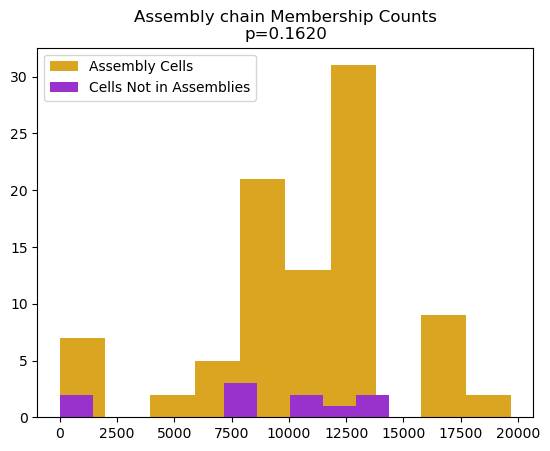

In [521]:
''''
    #print(participation_count_list)
    #participation = interior_chains_by_assembly
    #print(f'\tMean Participation: {np.mean(participation_count_list_total)}')
    #print("Mean Difference (effect size estimate):", (np.mean(participation_count_list) - np.mean(non_assembly_participation_count_list)))
    #print("Standard Deviations: \n\tin-assembly:", np.std(participation_count_list), "\n\tnot-in-assembly:", np.std(non_assembly_participation_count_list))
#d = participation_coregistered_rate -  non_assembly_participation_count_list
stat, p_value = brunnermunzel(participation_coregistered_rate, non_assembly_participation_count_list, 'greater')#, 'greater','normal')
print()

plt.figure()
plt.title(f'Assembly chain Membership Counts\np={p_value:.4f}')
plt.hist(participation_coregistered_rate, color='goldenrod') #, bins=range(0, 1700, 50)
plt.hist(non_assembly_participation_count_list,color='darkorchid') #, bins=range(0, 1700, 50)
plt.legend([f'Assembly Cells', 'Cells Not in Assemblies'])
    #plt.savefig(f'Chain Length Three Participation Assembly {assembly_id}.png')


#plt.legend(legend_list)   //already there
#plt.title('Third-Order Structural PSD sizes by Functional Assembly Groups')
#plt.savefig('pyc_34chain_stefan_third_order_PSD_sizes_by_assembly.png')'''

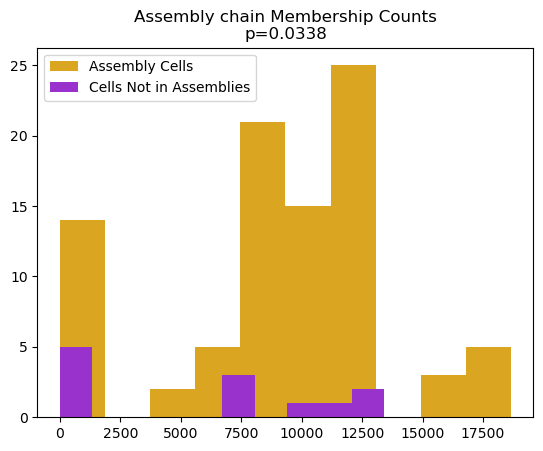

In [36]:

stat_result, p_value_result = ranksums(participation_coregistered_rate, non_assembly_participation_count_list, 'greater')
print()

plt.figure()
plt.title(f'Assembly chain Membership Counts\np={p_value_result:.4f}')
plt.hist(participation_coregistered_rate, color='goldenrod') #, bins=range(0, 1700, 50)
plt.hist(non_assembly_participation_count_list,color='darkorchid') #, bins=range(0, 1700, 50)
plt.legend([f'Assembly Cells', 'Cells Not in Assemblies'])
    #plt.savefig(f'Chain Length Three Participation Assembly {assembly_id}.png')


#plt.legend(legend_list)   //already there
#plt.title('Third-Order Structural PSD sizes by Functional Assembly Groups')
#plt.savefig('pyc_34chain_stefan_third_order_PSD_sizes_by_assembly.png')

A 1
	Mean Participation: 21916.04761904762
Mean Difference (effect size estimate): 3699.0476190476184
Standard Deviations: 
	in-assembly: 6175.561832749581 
	not-in-assembly: 4572.840036563711

A 2
	Mean Participation: 20061.88888888889
Mean Difference (effect size estimate): 1844.8888888888905
Standard Deviations: 
	in-assembly: 5044.518398870521 
	not-in-assembly: 4572.840036563711

A 3
	Mean Participation: 18939.9
Mean Difference (effect size estimate): 722.9000000000015
Standard Deviations: 
	in-assembly: 5161.16803543539 
	not-in-assembly: 4572.840036563711

A 4
	Mean Participation: 20554.3
Mean Difference (effect size estimate): 2337.2999999999993
Standard Deviations: 
	in-assembly: 5142.519577988985 
	not-in-assembly: 4572.840036563711

A 5
	Mean Participation: 18985.75
Mean Difference (effect size estimate): 768.75
Standard Deviations: 
	in-assembly: 3948.0984584354023 
	not-in-assembly: 4572.840036563711

A 6
	Mean Participation: 15836.0
Mean Difference (effect size estimate):

Text(0.5, 1.0, 'Third-Order Structural PSD sizes by Functional Assembly Groups')

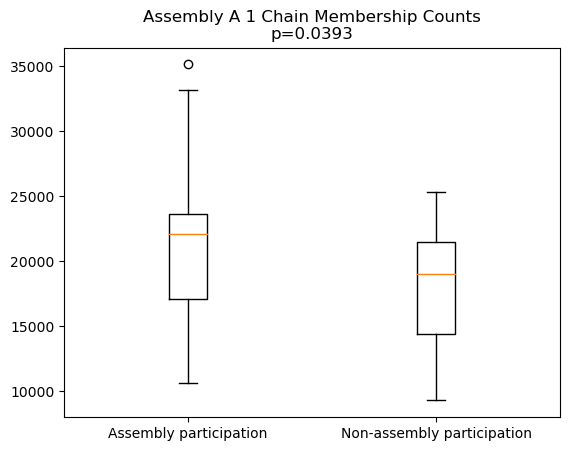

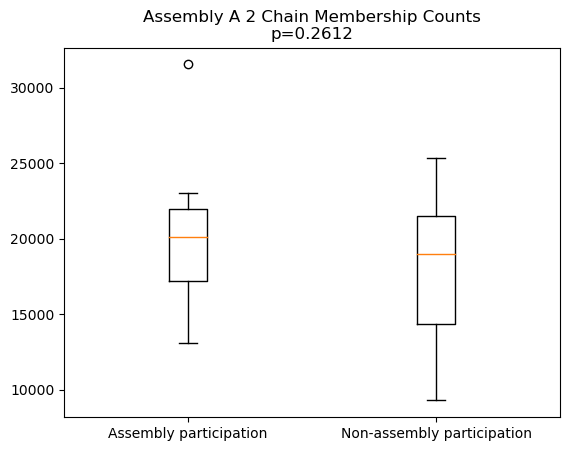

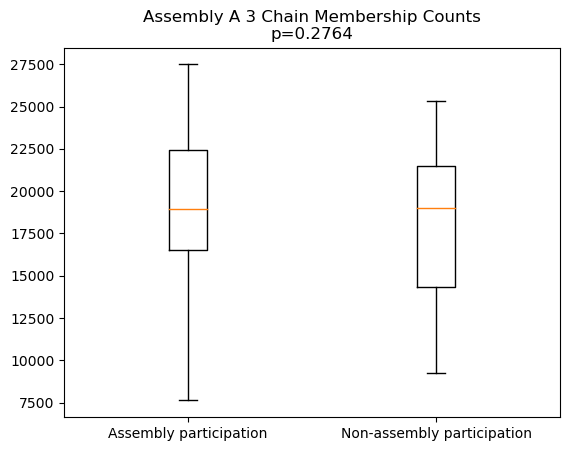

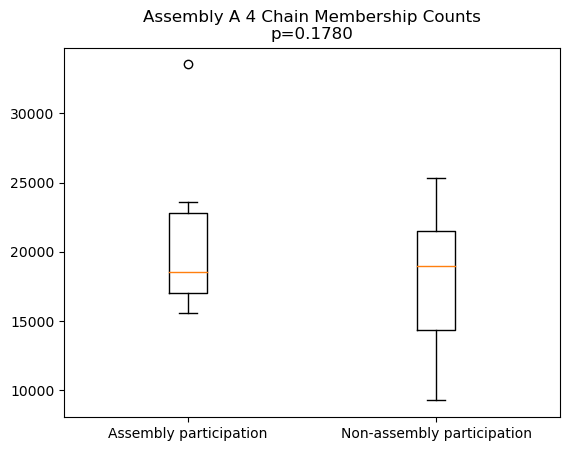

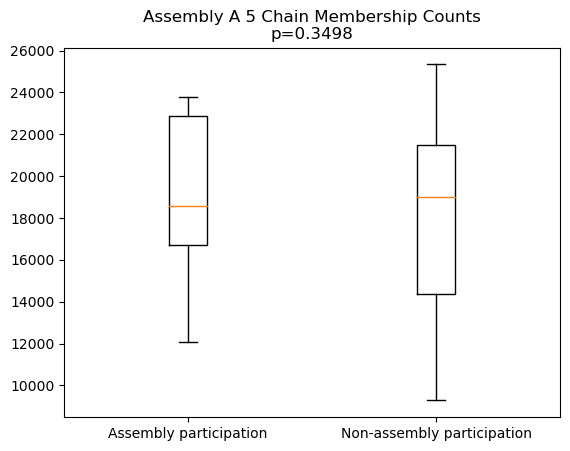

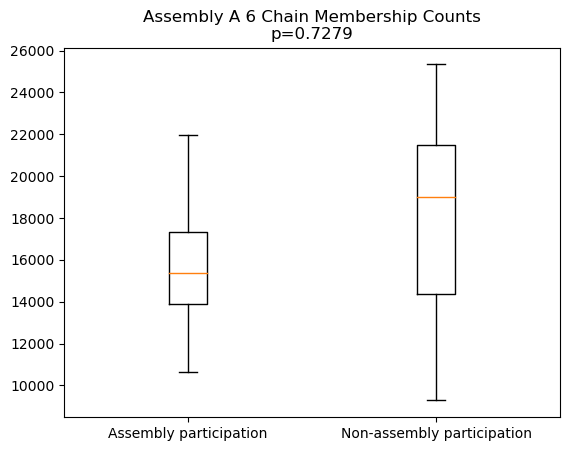

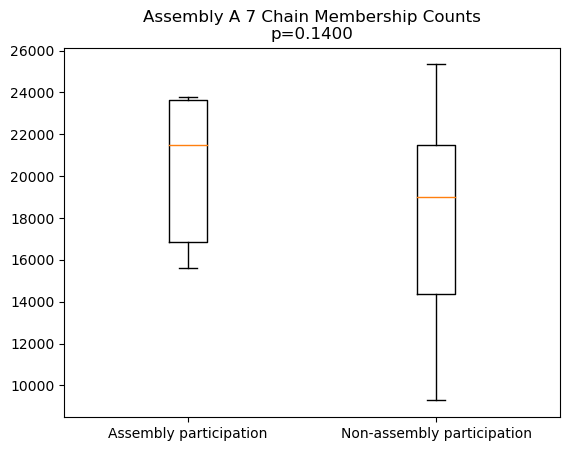

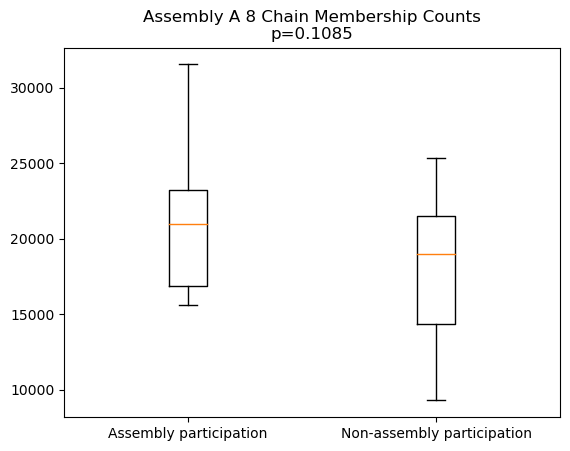

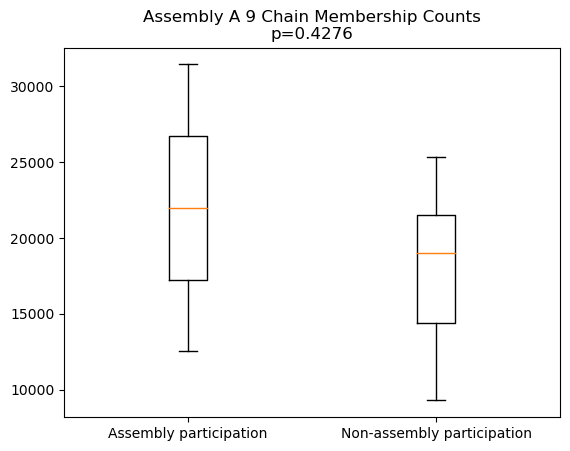

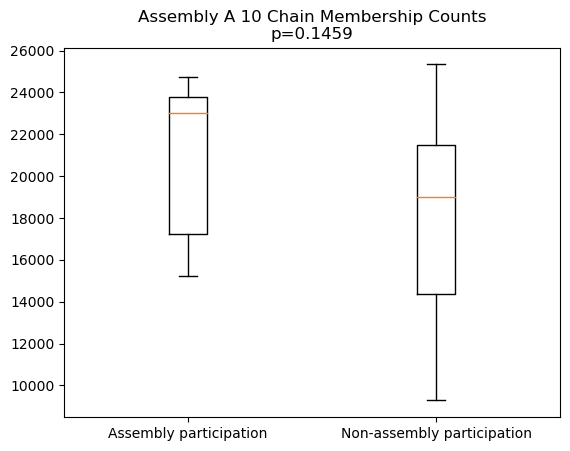

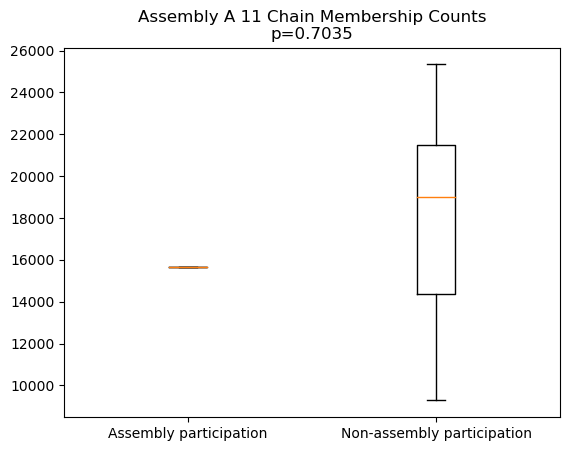

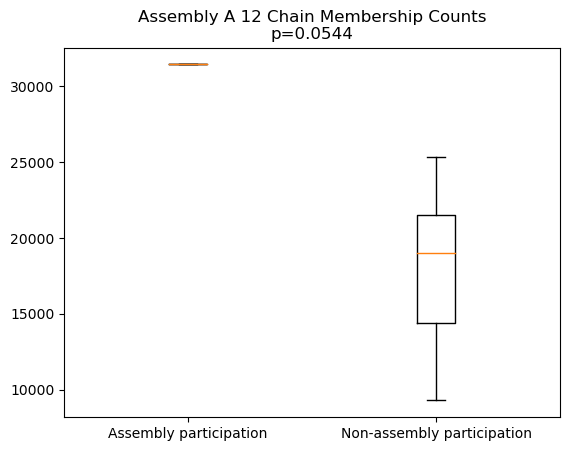

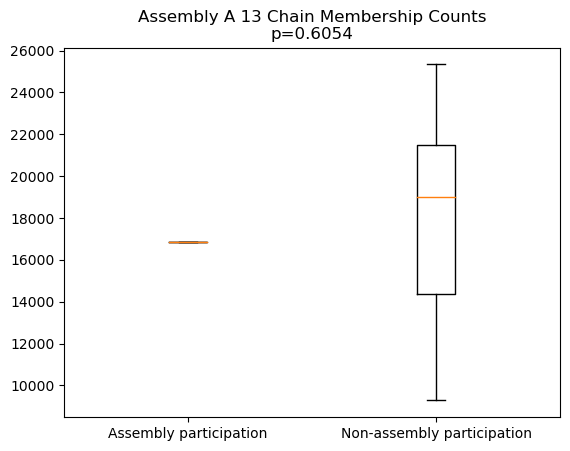

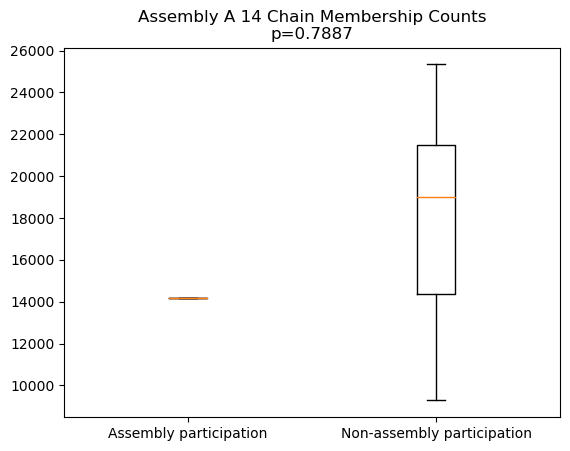

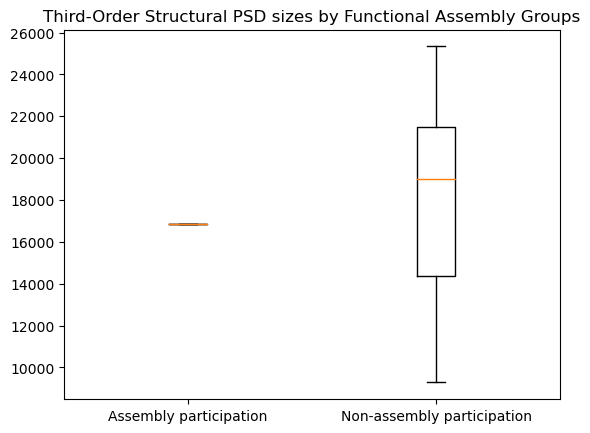

In [64]:
for assembly_id in list(participation_of_assembly_cells.keys()):
    participation_count_list = []
    for cell_id in participation_of_assembly_cells[assembly_id].keys():
         participation_count_list.append(participation_of_assembly_cells[assembly_id][cell_id]) 
    print(assembly_id)
    #print(participation_count_list)
    #participation = interior_chains_by_assembly
    print(f'\tMean Participation: {np.mean(participation_count_list)}')
    print("Mean Difference (effect size estimate):", (np.mean(participation_count_list) - np.mean(non_assembly_participation_count_list)))
    print("Standard Deviations: \n\tin-assembly:", np.std(participation_count_list), "\n\tnot-in-assembly:", np.std(non_assembly_participation_count_list))
    stat, p_value = ranksums(participation_count_list, non_assembly_participation_count_list, 'greater')
    print()

    plt.figure()
    plt.title(f'Assembly {assembly_id} Chain Membership Counts\np={p_value:.4f}')
    plt.boxplot([participation_count_list, non_assembly_participation_count_list],  labels= ['Assembly participation', 'Non-assembly participation']) #, bins=range(0, 1700, 50)
    #plt.boxplot(non_assembly_participation_count_list,color='darkorchid') #, bins=range(0, 1700, 50)
   # plt.legend([f'Assembly {assembly_id} Cells', 'Cells Not in Assemblies'])
    #plt.savefig(f'Chain Length Three Participation Assembly {assembly_id}.png')


#plt.legend(legend_list)   //already there
plt.title('Third-Order Structural PSD sizes by Functional Assembly Groups')
#plt.savefig('pyc_34chain_stefan_third_order_PSD_sizes_by_assembly.png')